# **Hands on Physics Informed Neural Networks**

### **Tutorial @ The MAGNET4Cardiac7T Spring School 2025**

#### **Cecília Coelho**, *Institute for Artificial Intelligence, Helmut Schmidt University, Hamburg, Germany and Centre of Mathematics of University of Minho (CMAT), Portugal*
##### **cecilia.coelho@hsu-hh.de**

#### **Go to [website][Website]**

[Website]: https://symbiosisnn-des.github.io/

--------------------------------------------------------

# Differential Equations Basics (Part I)

#### Numerical solution of a simple ODE using the explicit Euler method


The differential equation $\dfrac{df(t)}{dt}=e^{−t}$ with initial condition $f(0)=−1$ has the exact solution $f(t)=−e^{−t}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the **Explicit Euler Formula**. Plot the difference between the approximated solution and the exact solution.



Play with the **solver**, **model parameters** and the **number of mesh elements**.

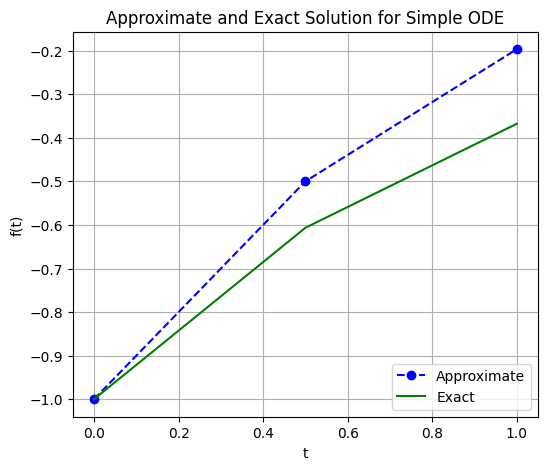

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.5 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (6, 5))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Differential Equations Basics (Part II)

#### Logistic Growth of a Population of Organisms

Consider a population of organisms that follows a logistic growth. The population size $P(t)$ at time $t$ is governed by the following differential equation:
            \begin{equation}
             P'(t) = r P(t) \left(1 - \frac{P(t)}{K}\right), \quad P(t_0) = 100, 
            \end{equation}
            where $r$ is the growth rate, and $K$ is the carrying capacity of the environment. Consider $r=0.1, K=1000$. Also, consider a mesh of 200 points.



Play with the **solver**, **model parameters** and the **number of mesh elements**.

##### First, try to implement $P'(t) = r P(t)$

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [63]:
# Your code here: define the ODE and problem variables/parameters


sol = solve_ivp(ODE, [0, 5], y0, t_eval=t)

plt.figure(figsize = (6, 5))
plt.plot(sol.t.T, sol.y.T,'bo--', label='Approximate')
plt.plot(t, y0*np.exp(r*t), 'g', label='Exact')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# !Solution!

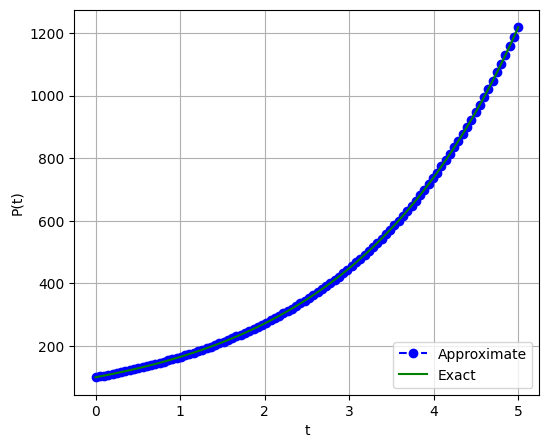

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

r = 0.5
y0 = [100]
t = np.linspace(0, 5, 100)

def ODE(t, y):
    return r * y

sol = solve_ivp(ODE, [0, 5], y0, t_eval=t)

plt.figure(figsize = (6, 5))
plt.plot(sol.t.T, sol.y.T,'bo--', label='Approximate')
plt.plot(t, y0*np.exp(r*t), 'g', label='Exact')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

##### Now try to implement $P'(t) = r P(t) \left(1 - \frac{P(t)}{K}\right)$

In [ ]:
# Your code here:

plt.figure(figsize = (6, 5))
plt.plot(sol.t.T, sol.y.T,'bo--', label='Approximate')
tnew = np.linspace(0, 200, 200)
plt.plot(tnew, (K*y0*np.exp(r*tnew))/(K+y0*(np.exp(r*tnew)-1)), 'g', label='Exact')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# !Solution!

In [8]:

r = 0.1
K = 100
y0 = 1
t = np.linspace(0, 200, 3)

def ODE(t, y):
    return r * y * (1- y/K)

sol = solve_ivp(ODE, [0, 200], [y0], t_eval=t)

plt.figure(figsize = (6, 5))
plt.plot(sol.t.T, sol.y.T,'bo--', label='Approximate')
tnew = np.linspace(0, 200, 200)
plt.plot(tnew, (K*y0*np.exp(r*tnew))/(K+y0*(np.exp(r*tnew)-1)), 'g', label='Exact')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

NameError: name 'np' is not defined

--------------------------------------------------------

## Physics-Informed Neural Networks

 Consider the 1D Burger's Equation with Dirichlet boundary conditions and $\lambda_1=1, \lambda_2=\frac{0.01}{\pi}$:
            $$
             \begin{align*}
                    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \frac{0.01}{\pi} \frac{\partial^2u}{\partial x^2} = 0, \quad x\in [-1,1], t\in [0,1], \\
                    u(0,x) = -\sin(\pi x),\\
                    u(t,-1) = u(t,1) = 0.
                \end{align*}
            $$


In [20]:
!pip install torch deepxde

zsh:1: command not found: pip


In [21]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import integrate
import torch

### Data-driven solutions

**Problem:** *Given fixed model parameters $\lambda$, what can be said about the unknown $u(t, x)$?*
            
PINNs approximate the solution $u(x)$ using a neural network $\hat{u}(x; \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ represents the network parameters. The PINN is trained to fit the data and satisfy the PDE

#### 1D Burger's Equation

**Hands-on**

What happens if we change the number of training points inside the domain? What about in the initial and boundary conditions?

Compiling model...
'compile' took 0.000219 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.89e-02, 3.52e-02, 4.44e-01]    [8.89e-02, 3.52e-02, 4.44e-01]    []  
1000      [3.98e-02, 1.30e-03, 5.70e-02]    [3.98e-02, 1.30e-03, 5.70e-02]    []  
2000      [3.15e-02, 2.10e-04, 4.77e-02]    [3.15e-02, 2.10e-04, 4.77e-02]    []  
3000      [2.40e-02, 1.05e-04, 3.23e-02]    [2.40e-02, 1.05e-04, 3.23e-02]    []  
4000      [6.92e-03, 9.39e-05, 6.70e-03]    [6.92e-03, 9.39e-05, 6.70e-03]    []  
5000      [3.49e-03, 2.57e-05, 3.32e-03]    [3.49e-03, 2.57e-05, 3.32e-03]    []  
6000      [2.45e-03, 1.29e-05, 2.08e-03]    [2.45e-03, 1.29e-05, 2.08e-03]    []  
7000      [1.88e-03, 1.15e-05, 1.30e-03]    [1.88e-03, 1.15e-05, 1.30e-03]    []  
8000      [1.71e-03, 9.07e-06, 9.19e-04]    [1.71e-03, 9.07e-06, 9.19e-04]    []  
9000      [1.06e-03, 5.86e-06, 7.15e-04]    [1.06e-03, 5.86e-06, 7.15e-04]    []  
10000     [8.80

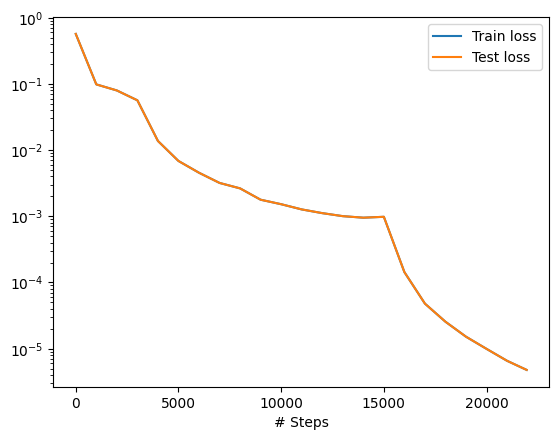

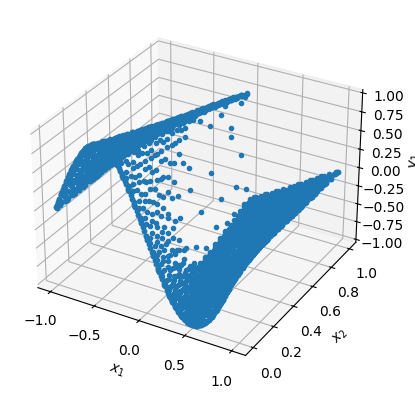

Mean residual: 0.0055917865
L2 relative error: 0.03666178750663362


In [22]:
def gen_testdata():
    data = np.load("Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y


def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(iterations=15000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X, y_true = gen_testdata()
y_pred = model.predict(X)
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

#### Lotka-Volterra

**Hands-on**

Use PINNs to approximate the solution of the following Lotka-Volterra problem to know how the population of rabbits and foxes change over time in a system:
                $$\begin{align*}
                    \dfrac{dr}{dt}=\dfrac{R}{U}(2Ur - 0.04U^2rf), \quad \dfrac{df}{dt}=\dfrac{R}{U}(0.002U^2rf - 1.06Uf), \\
                    r(0)= \dfrac{100}{U}, \quad f(0)=\dfrac{15}{U}
                \end{align*}$$
                with $U=200$ and $R=20$.

### Exercise Tasks  

1. **Define Function Task:** 

In [ ]:
ub = 200
rb = 20


def func(t, r):
    # Your code here:
    return dx_t, dy_t


def gen_truedata():
    t = np.linspace(0, 1, 100)

    sol = integrate.solve_ivp(func, (0, 10), (100 / ub, 15 / ub), t_eval=t)
    x_true, y_true = sol.y
    x_true = x_true.reshape(100, 1)
    y_true = y_true.reshape(100, 1)

    return x_true, y_true

2. **Define ODE Task:** 

In [ ]:
def ode_system(x, y):
    # Your code here:
    return [
        
    ]


3. **Define Domain and NN Task:** 

In [ ]:
# Your code here:
geom = 
data = 
# Your code here:
layer_size = 
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [ ]:
def input_transform(t):
    return torch.cat(
        [
            torch.sin(t),
        ],
        dim=1,
    )


# hard constraints: x(0) = 100, y(0) = 15

def output_transform(t, y):
    y1 = y[:, 0:1]
    y2 = y[:, 1:2]
    return torch.cat([y1 * torch.tanh(t) + 100 / ub, y2 * torch.tanh(t) + 15 / ub], dim=1)

net.apply_feature_transform(input_transform)
net.apply_output_transform(output_transform)
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=1000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

plt.xlabel("t")
plt.ylabel("population")

t = np.linspace(0, 1, 100)
x_true, y_true = gen_truedata()
plt.plot(t, x_true, color="black", label="x_true")
plt.plot(t, y_true, color="blue", label="y_true")

t = t.reshape(100, 1)
sol_pred = model.predict(t)
x_pred = sol_pred[:, 0:1]
y_pred = sol_pred[:, 1:2]

plt.plot(t, x_pred, color="red", linestyle="dashed", label="x_pred")
plt.plot(t, y_pred, color="orange", linestyle="dashed", label="y_pred")
plt.legend()
plt.show()

# !Solution!

Compiling model...
'compile' took 0.000399 s

Training model...

Step      Train loss              Test loss               Test metric
0         [8.27e+01, 2.24e+01]    [8.26e+01, 2.25e+01]    []  
1000      [3.04e+00, 4.27e-01]    [2.91e+00, 4.12e-01]    []  

Best model at step 1000:
  train loss: 3.46e+00
  test loss: 3.32e+00
  test metric: []

'train' took 6.980187 s

Compiling model...
'compile' took 0.000244 s

Training model...

Step      Train loss              Test loss               Test metric
1000      [3.04e+00, 4.27e-01]    [2.91e+00, 4.12e-01]    []  
2000      [1.57e-02, 1.77e-03]    [1.55e-02, 1.66e-03]    []  
2498      [1.49e-02, 1.41e-03]    [1.49e-02, 1.35e-03]    []  

Best model at step 2498:
  train loss: 1.63e-02
  test loss: 1.62e-02
  test metric: []

'train' took 15.339191 s

Saving loss history to /Users/ceciliacoelho/Downloads/ECAITutorial/loss.dat ...
Saving training data to /Users/ceciliacoelho/Downloads/ECAITutorial/train.dat ...
Saving test data to /U

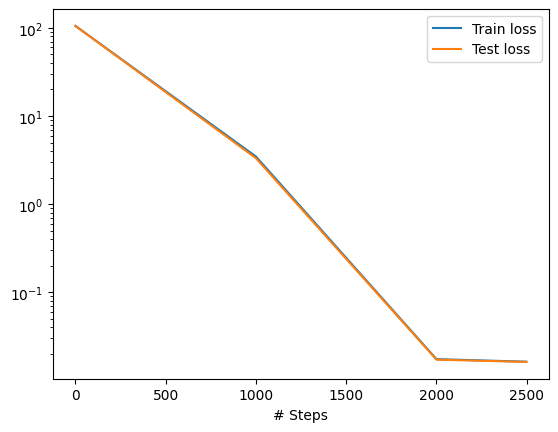

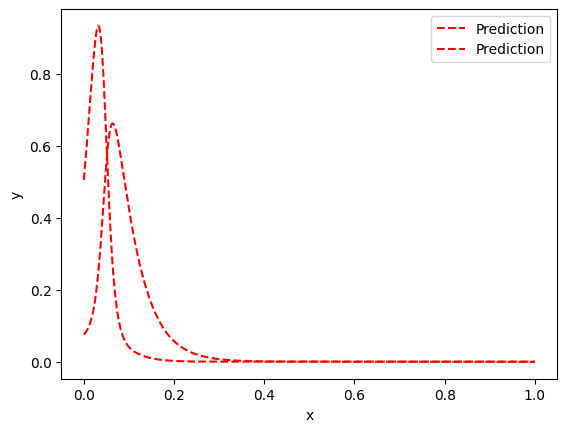

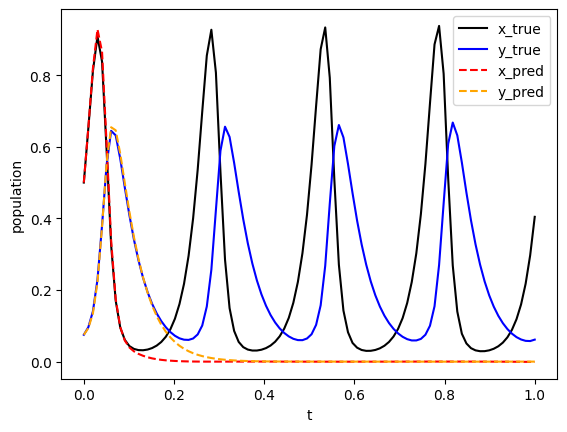

In [55]:
ub = 200
rb = 20


def func(t, r):
    x, y = r
    dx_t = 1 / ub * rb * (2.0 * ub * x - 0.04 * ub * x * ub * y)
    dy_t = 1 / ub * rb * (0.02 * ub * x * ub * y - 1.06 * ub * y)
    return dx_t, dy_t


def gen_truedata():
    t = np.linspace(0, 1, 100)

    sol = integrate.solve_ivp(func, (0, 10), (100 / ub, 15 / ub), t_eval=t)
    x_true, y_true = sol.y
    x_true = x_true.reshape(100, 1)
    y_true = y_true.reshape(100, 1)

    return x_true, y_true


def ode_system(x, y):
    r = y[:, 0:1]
    p = y[:, 1:2]
    dr_t = dde.grad.jacobian(y, x, i=0)
    dp_t = dde.grad.jacobian(y, x, i=1)
    
    return [
        dr_t - 1 / ub * rb * (2.0 * ub * r - 0.04 * ub * r * ub * p),
        dp_t - 1 / ub * rb * (0.02 * r * ub * p * ub - 1.06 * p * ub),
    ]

geom = dde.geometry.TimeDomain(0, 1.0)
data = dde.data.PDE(geom, ode_system, [], 3000, 2, num_test=3000)

layer_size = [1] + [64] * 6 + [2]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)


def input_transform(t):
    return torch.cat(
        [
            torch.sin(t),
        ],
        dim=1,
    )


# hard constraints: x(0) = 100, y(0) = 15

def output_transform(t, y):
    y1 = y[:, 0:1]
    y2 = y[:, 1:2]
    return torch.cat([y1 * torch.tanh(t) + 100 / ub, y2 * torch.tanh(t) + 15 / ub], dim=1)

net.apply_feature_transform(input_transform)
net.apply_output_transform(output_transform)
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=1000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

plt.xlabel("t")
plt.ylabel("population")

t = np.linspace(0, 1, 100)
x_true, y_true = gen_truedata()
plt.plot(t, x_true, color="black", label="x_true")
plt.plot(t, y_true, color="blue", label="y_true")

t = t.reshape(100, 1)
sol_pred = model.predict(t)
x_pred = sol_pred[:, 0:1]
y_pred = sol_pred[:, 1:2]

plt.plot(t, x_pred, color="red", linestyle="dashed", label="x_pred")
plt.plot(t, y_pred, color="orange", linestyle="dashed", label="y_pred")
plt.legend()
plt.show()

## Study case 1 - PINNs for the Helmholtz equation over a 2D square domain

### Goal - Implement a PINN to solve the Helmholtz equation over a 2D square domain using PyTorch.

### Background  

The Helmholtz equation is widely used in physics and engineering to describe wave propagation phenomena. In this exercise, we solve the following Helmholtz equation:  

$$
- u_{xx} - u_{yy} - k_0^2 u = f, \quad \Omega = [0,1]^2
$$  

with Dirichlet boundary conditions:  

$$
u(x,y) = 0, \quad (x,y) \in \partial \Omega
$$  

and a source term:  

$$
f(x,y) = k_0^2 \sin(k_0 x) \sin(k_0 y).
$$  

For $$ k_0 = 2\pi n $$ with $$ n = 2 $$, the exact solution is:  

$$
u(x,y) = \sin(k_0 x) \sin(k_0 y).
$$  


---

### Problem Setup  

#### Parameters  
We will use the following parameters for this problem:  

- **Domain:** $ [0,1]^2 $
- **Wavenumber:** $ k_0 = 2\pi n $, where $ n = 2 $
- **Boundary conditions:** Dirichlet $ u(x,y)=0 $ on $ \partial \Omega $  
- **Source term:** $ f(x,y) = k_0^2 \sin(k_0 x)\sin(k_0 y) $

---

In [ ]:
# Your code here:


## !Solution!

Compiling model...
'compile' took 0.000198 s

Training model...

0         [5.21e+03]                                            [6.44e+03]                                            [1.00e+00]
1000      [3.95e+01]                                            [4.73e+01]                                            [2.81e-01]
2000      [3.08e+00]                                            [3.63e+00]                                            [5.88e-02]
3000      [9.08e-01]                                            [9.79e-01]                                            [1.80e-02]
4000      [8.01e-02]                                            [8.83e-02]                                            [2.86e-03]
5000      [1.02e+00]                                            [1.08e+00]                                            [1.60e-02]

Best model at step 4000:
  train loss: 8.01e-02
  test loss: 8.83e-02
  test metric: [2.86e-03]

'train' took 39.468136 s

Saving loss history to /Users/cecilia

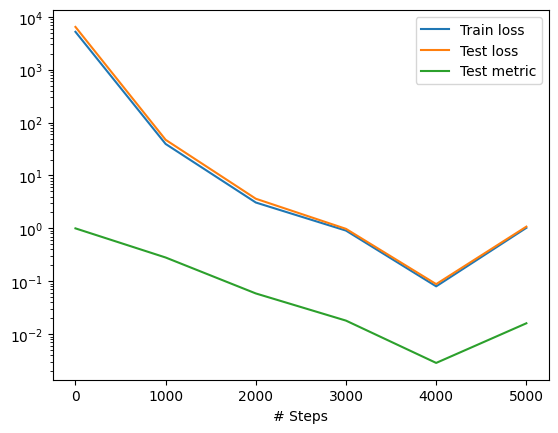

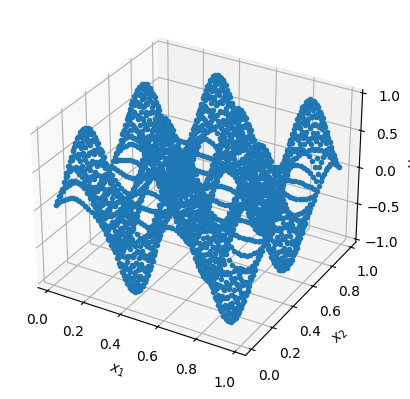

In [51]:
import deepxde as dde
import numpy as np

# General parameters
n = 2
precision_train = 10
precision_test = 30
hard_constraint = True
weights = 100  # if hard_constraint == False
iterations = 5000
parameters = [1e-3, 3, 150, "sin"]

# Define sine function
sin = dde.backend.sin

learning_rate, num_dense_layers, num_dense_nodes, activation = parameters

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    f = k0**2 * sin(k0 * x[:, 0:1]) * sin(k0 * x[:, 1:2])
    return -dy_xx - dy_yy - k0**2 * y - f


def func(x):
    return np.sin(k0 * x[:, 0:1]) * np.sin(k0 * x[:, 1:2])


def transform(x, y):
    res = x[:, 0:1] * (1 - x[:, 0:1]) * x[:, 1:2] * (1 - x[:, 1:2])
    return res * y


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Rectangle([0, 0], [1, 1])
k0 = 2 * np.pi * n
wave_len = 1 / n

hx_train = wave_len / precision_train
nx_train = int(1 / hx_train)

hx_test = wave_len / precision_test
nx_test = int(1 / hx_test)

if hard_constraint == True:
    bc = []
else:
    bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)


data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=nx_train**2,
    num_boundary=4 * nx_train,
    solution=func,
    num_test=nx_test**2,
)

net = dde.nn.FNN(
    [2] + [num_dense_nodes] * num_dense_layers + [1], activation, "Glorot uniform"
)

if hard_constraint == True:
    net.apply_output_transform(transform)

model = dde.Model(data, net)

if hard_constraint == True:
    model.compile("adam", lr=learning_rate, metrics=["l2 relative error"])
else:
    loss_weights = [1, weights]
    model.compile(
        "adam",
        lr=learning_rate,
        metrics=["l2 relative error"],
        loss_weights=loss_weights,
    )


losshistory, train_state = model.train(iterations=iterations)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

### Data-driven discovery

**Problem:** *What are the parameters $\lambda$ that best describe the observed data?*

Again, PINNs approximate the solution $u(x)$ using a neural network $\hat{u}(x; \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ represents the network parameters.

#### Diffusion Equation

We will solve an inverse problem for the diffusion equation with an unknown parameter $C$:

\begin{equation}
    \frac{\partial y}{\partial t} = C\frac{\partial^2 y}{\partial x^2} - e^{-t} (\sin(\pi x) - \pi^2 \sin(\pi x)), \quad x \in [-1, 1], \quad t \in [0, 1]
\end{equation}

with the initial condition

\begin{equation}
    y(x, 0) = \sin(\pi x)
\end{equation}

and the Dirichlet boundary condition

\begin{equation}
    y(-1, t) = y(1, t) = 0.
\end{equation}

The reference solution is 

\begin{equation}
    y = e^{-t} \sin(\pi x).
\end{equation}


Compiling model...
'compile' took 0.000142 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.35e+01, 1.20e-02, 4.36e-01, 6.75e-02]    [1.57e+01, 1.20e-02, 4.36e-01, 6.75e-02]    [9.17e-01]    
0 [2.00e+00]
1000      [4.37e-03, 2.56e-02, 4.69e-02, 1.74e-02]    [4.23e-03, 2.56e-02, 4.69e-02, 1.74e-02]    [3.79e-01]    
1000 [1.93e+00]
2000      [2.13e-03, 4.63e-03, 1.09e-02, 6.05e-03]    [3.54e-03, 4.63e-03, 1.09e-02, 6.05e-03]    [3.40e-01]    
2000 [1.56e+00]
3000      [1.38e-03, 6.04e-04, 1.19e-03, 1.92e-03]    [3.44e-03, 6.04e-04, 1.19e-03, 1.92e-03]    [1.92e-01]    
3000 [1.25e+00]
4000      [1.91e-04, 2.27e-04, 3.64e-05, 2.87e-04]    [9.71e-04, 2.27e-04, 3.64e-05, 2.87e-04]    [7.41e-02]    
4000 [1.09e+00]
5000      [1.28e-04, 1.08e-04, 6.92e-06, 6.33e-05]    [4.13e-04, 1.08e-04, 6.92e-06, 6.33e-05]    [3.44e-02]    
5000 [1.04e+00]
6000      [9.90e-05, 5.74e-05, 4.82e-06, 1.94e-05] 

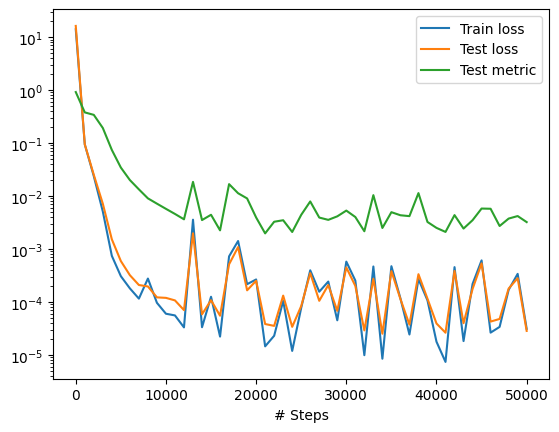

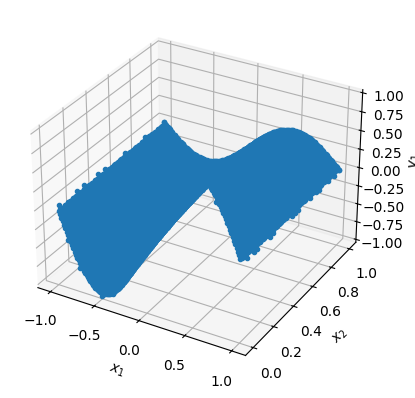

In [24]:
C = dde.Variable(2.0)


def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return (
        dy_t
        - C * dy_xx
        + torch.exp(-x[:, 1:])
        * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    )
    

def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

observe_x = np.vstack((np.linspace(-1, 1, num=10), np.full((10), 1))).T
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x), component=0)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_y],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    anchors=observe_x,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=C
)
variable = dde.callbacks.VariableValue(C, period=1000)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

**Hands-on**

What happens if we change the number of training points inside the domain? What about in the initial and boundary conditions?

#### Lorenz System

**Hands-on**

Use PINNs to discover $\sigma, \rho, \beta$ for the following Lorenz system:
                $$\begin{align*}
                    \dfrac{dx}{dt}=\sigma(y-x), \quad \dfrac{dy}{dt}=x(\rho-z)-y, \quad \dfrac{dz}{dt}=xy-\beta z, \quad t\in[0,3]\\
                    x(0)=-8, \quad y(0)=7, \quad z(0) = 27.
                \end{align*}$$

### Exercise Tasks  

1. **Define Variables Task:** 

In [ ]:
import deepxde as dde
import numpy as np


def gen_traindata():
    data = np.load("Lorenz.npz")
    return data["t"], data["y"]

# Your code here:




2. **Define Lorenz System Task:** 

In [ ]:
def Lorenz_system(x, y):
    """Lorenz system.
    dy1/dx = 10 * (y2 - y1)
    dy2/dx = y1 * (15 - y3) - y2
    dy3/dx = y1 * y2 - 8/3 * y3
    """
    # Your code here:
    return [
        
    ]
    
def boundary(_, on_initial):
    return on_initial


2. **Define Domain Task:** 

In [ ]:
geom = dde.geometry.TimeDomain(0, 3)

# Initial conditions
# Your code here:

# Get the train data
# Your code here:
observe_t, ob_y = gen_traindata()
observe_y0 = 
observe_y1 = 
observe_y2 = 

In [ ]:
data = dde.data.PDE(
    geom,
    Lorenz_system,
    [ic1, ic2, ic3, observe_y0, observe_y1, observe_y2],
    num_domain=400,
    num_boundary=2,
    anchors=observe_t,
)

net = dde.nn.FNN([1] + [40] * 3 + [3], "tanh", "Glorot uniform")
model = dde.Model(data, net)

external_trainable_variables = [C1, C2, C3]
variable = dde.callbacks.VariableValue(
    external_trainable_variables, period=600, filename="variables.dat"
)

# train adam
model.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables
)
losshistory, train_state = model.train(iterations=20000, callbacks=[variable])

# train lbfgs 
model.compile("L-BFGS", external_trainable_variables=external_trainable_variables)
losshistory, train_state = model.train(callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# !Solution!

Compiling model...
'compile' took 0.000319 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [2.42e-01, 4.53e-01, 2.87e-01, 6.40e+01, 4.90e+01, 7.29e+02, 3.35e+01, 4.35e+01, 2.66e+02]    [2.42e-01, 4.53e-01, 2.87e-01, 6.40e+01, 4.90e+01, 7.29e+02, 3.35e+01, 4.35e+01, 2.66e+02]    []  
1000      [4.62e+00, 3.13e+00, 3.16e+00, 3.43e+01, 9.91e-03, 2.25e+00, 3.34e+01, 6.39e+00, 1.04e+01]    [4.62e+00, 3.13e+00, 3.16e+00, 3.43e+01, 9.91e-03, 2.25e+00, 3.34e+01, 6.39e+00, 1.04e+01]    []  
2000      [9.13e+00, 1.91e+00, 1.39e+00, 1.75e+01, 3.17e-01, 1.66e+00, 3.29e+01, 1.54e+01, 4.43e+00]    [9.13e+00, 1.91e+00, 1.39e+00, 1.75e+01, 3.17e-01, 1.66e+00, 3.29e+01, 1.54e+01, 4.43e+00]    []  
3000      [8.62e+00, 1.95e+00, 1.03e+00, 1.39e+01, 3.88e-01, 1.52e+00, 3.29e+01, 1.87e+01, 2.83e+00]    [8.62e+00, 1

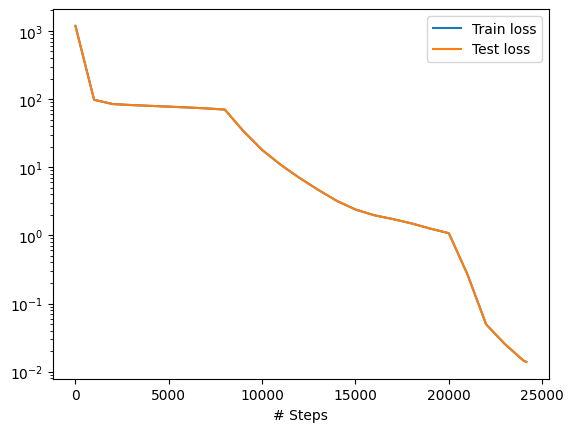

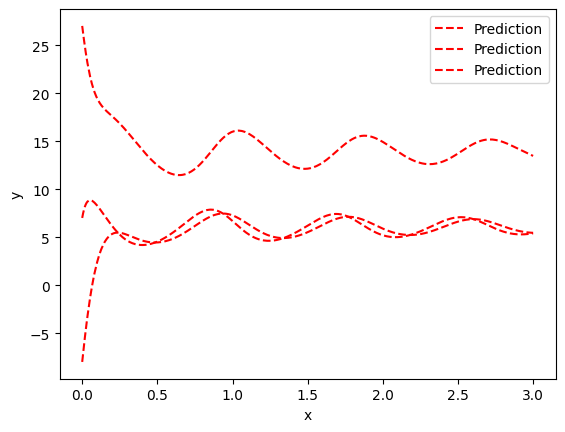

In [25]:
import deepxde as dde
import numpy as np


def gen_traindata():
    data = np.load("Lorenz.npz")
    return data["t"], data["y"]


C1 = dde.Variable(1.0)
C2 = dde.Variable(1.0)
C3 = dde.Variable(1.0)


def Lorenz_system(x, y):
    """Lorenz system.
    dy1/dx = 10 * (y2 - y1)
    dy2/dx = y1 * (15 - y3) - y2
    dy3/dx = y1 * y2 - 8/3 * y3
    """
    y1, y2, y3 = y[:, 0:1], y[:, 1:2], y[:, 2:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    dy3_x = dde.grad.jacobian(y, x, i=2)
    return [
        dy1_x - C1 * (y2 - y1),
        dy2_x - y1 * (C2 - y3) + y2,
        dy3_x - y1 * y2 + C3 * y3,
    ]
    
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 3)

# Initial conditions
ic1 = dde.icbc.IC(geom, lambda X: -8, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda X: 7, boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda X: 27, boundary, component=2)

# Get the train data
observe_t, ob_y = gen_traindata()
observe_y0 = dde.icbc.PointSetBC(observe_t, ob_y[:, 0:1], component=0)
observe_y1 = dde.icbc.PointSetBC(observe_t, ob_y[:, 1:2], component=1)
observe_y2 = dde.icbc.PointSetBC(observe_t, ob_y[:, 2:3], component=2)

data = dde.data.PDE(
    geom,
    Lorenz_system,
    [ic1, ic2, ic3, observe_y0, observe_y1, observe_y2],
    num_domain=400,
    num_boundary=2,
    anchors=observe_t,
)

net = dde.nn.FNN([1] + [40] * 3 + [3], "tanh", "Glorot uniform")
model = dde.Model(data, net)

external_trainable_variables = [C1, C2, C3]
variable = dde.callbacks.VariableValue(
    external_trainable_variables, period=600, filename="variables.dat"
)

# train adam
model.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables
)
losshistory, train_state = model.train(iterations=20000, callbacks=[variable])

# train lbfgs 
model.compile("L-BFGS", external_trainable_variables=external_trainable_variables)
losshistory, train_state = model.train(callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Study Case 2 - PINNs inverse problem for the diffusion equation  


### Goal - Implement a PINN to solve an inverse problem for the diffusion equation, where the parameter $ C $ is unknown and must be identified.

### We aim to solve the following diffusion equation:

$$
\frac{\partial y}{\partial t} = C\frac{\partial^2 y}{\partial x^2} - e^{-t}(\sin(\pi x) - \pi^2\sin(\pi x)), \quad x \in [-1, 1], \, t \in [0, 1]
$$

with the initial condition:

$$
y(x, 0) = \sin(\pi x)
$$

and Dirichlet boundary conditions:

$$
y(-1, t) = y(1, t) = 0.
$$

The reference solution is given by:

$$
y(x, t) = e^{-t} \sin(\pi x).
$$

In this inverse problem, we will identify the unknown parameter $ C $ using observations at specific points.

---

### Problem Setup  

#### Parameters  
We will use the following parameters for this problem:  

- **Domain:** $ x \in [-1, 1] $, $ t \in [0, 1] $
- **Unknown parameter:** $ C $, initialized as $ C = 2.0 $
- **Boundary conditions:** Dirichlet ($ y(-1,t) = y(1,t) = 0 $)
- **Initial condition:** $ y(x, 0) = \sin(\pi x) $
- **Source term:** $ f(x,t) = e^{-t}(\sin(\pi x) - \pi^2\sin(\pi x)) $

---



In [ ]:
# Your code here:

## !Solution!

Compiling model...
'compile' took 0.000066 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.45e+01, 4.67e-03, 5.13e-01, 7.82e-02]    [1.69e+01, 4.67e-03, 5.13e-01, 7.82e-02]    [1.01e+00]    
0 [2.00e+00]
1000      [6.70e-03, 1.11e-02, 3.28e-02, 1.28e-02]    [8.31e-03, 1.11e-02, 3.28e-02, 1.28e-02]    [4.17e-01]    
1000 [1.93e+00]
2000      [1.11e-03, 2.01e-03, 8.87e-03, 7.55e-03]    [3.44e-03, 2.01e-03, 8.87e-03, 7.55e-03]    [3.89e-01]    
2000 [1.68e+00]
3000      [1.09e-03, 9.45e-04, 1.73e-03, 4.26e-03]    [7.35e-03, 9.45e-04, 1.73e-03, 4.26e-03]    [2.82e-01]    
3000 [1.43e+00]
4000      [2.31e-04, 2.77e-04, 5.95e-05, 1.21e-03]    [3.34e-03, 2.77e-04, 5.95e-05, 1.21e-03]    [1.47e-01]    
4000 [1.19e+00]
5000      [4.62e-04, 8.22e-05, 1.41e-05, 8.23e-05]    [1.11e-03, 8.22e-05, 1.41e-05, 8.23e-05]    [3.94e-02]    
5000 [1.05e+00]
6000      [8.60e-05, 1.24e-05, 2.41e-06, 1.26e-05] 

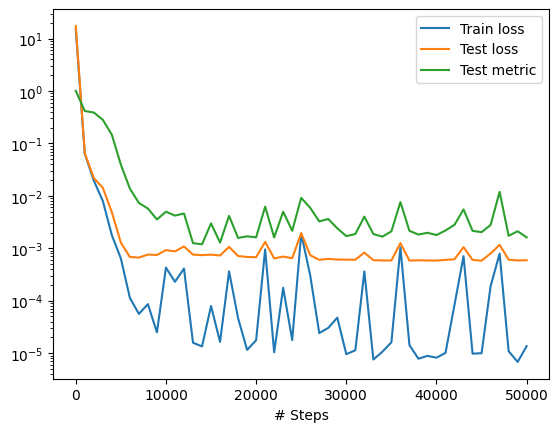

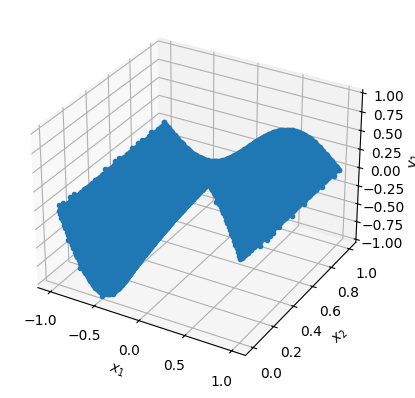

In [53]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf
import torch


C = dde.Variable(2.0)


def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return (
        dy_t
        - C * dy_xx
        + torch.exp(-x[:, 1:])
        * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    )
    


def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

observe_x = np.vstack((np.linspace(-1, 1, num=10), np.full((10), 1))).T
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x), component=0)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_y],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    anchors=observe_x,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=C
)
variable = dde.callbacks.VariableValue(C, period=1000)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Study Case 3 - PINNs for 1D Blood Flow in a Vessel

### Goal
In this exercise, we will use Physics-Informed Neural Networks (PINNs) to solve a forward problem for blood flow in a vessel. We consider a 1D vessel where blood flow is governed by a simplified version of the Navier-Stokes equation, specifically the Hagen-Poiseuille flow equation:

$
\frac{d^2 u}{dx^2} = -1
$

where:
- $ u(x) $ is the velocity profile of the blood flow,
- $ x $ is the position along the vessel,
- The right-hand side $ -1 $ represents a constant pressure gradient driving the flow.

We assume no-slip boundary conditions, meaning that the velocity at both ends of the vessel is zero:

$
 u(0) = 0, \quad u(L) = 0
$




 1.**Define PDE Task** Define the differential equation for blood flow (simplified Navier-Stokes)

In [ ]:

def blood_flow(x, y):
    """Your code goes here: Compute du_xx + 1"""
    du_x = dde.grad.jacobian(y, x, i=0, j=0)  # Compute du/dx
    du_xx = """Your code goes here: Compute d^2u/dx^2 using Hessian"""
    return """Your code goes here: Define the PDE residual"""



2.**Geometry Task** Define geometry (1D vessel of length L)

In [ ]:

L = 1.0
domain = """Your code goes here: Define the domain using dde.geometry.Interval"""



3.**Boundary conditions task** no-slip condition at vessel walls

In [ ]:

bc1 = """Your code goes here: Define Dirichlet BC at x=0"""
bc2 = """Your code goes here: Define Dirichlet BC at x=L"""



4.**Define the problem task**

In [ ]:

pde = dde.data.PDE(
    domain, blood_flow, [bc1, bc2], num_domain=10, num_boundary=2
)



5.**Neural network task**

In [ ]:

net = """Your code goes here: Define a feedforward neural network (FNN)"""



6.**Training Task**

In [ ]:

model = """Your code goes here: Create a dde.Model with the PDE and network"""
model.compile("adam", lr=0.01)
"""Your code goes here: Train the model using model.train()"""



In [ ]:
# Plot results
x_test = np.linspace(0, L, 100)[:, None]
y_pred = """Your code goes here: Predict using the trained model"""
plt.plot(x_test, y_pred, label="PINN Solution")
plt.xlabel("x (Position in Vessel)")
plt.ylabel("Velocity u(x)")
plt.legend()
plt.show()

### !Solution Code!

Compiling model...
'compile' took 0.000294 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.20e-01, 0.00e+00, 2.42e-02]    [6.20e-01, 0.00e+00, 2.42e-02]    []  
1000      [1.21e-05, 1.47e-10, 5.42e-11]    [1.21e-05, 1.47e-10, 5.42e-11]    []  
2000      [1.71e-06, 1.73e-11, 9.79e-14]    [1.71e-06, 1.73e-11, 9.79e-14]    []  
3000      [1.96e-06, 1.00e-09, 2.47e-09]    [1.96e-06, 1.00e-09, 2.47e-09]    []  
4000      [1.65e-06, 1.39e-07, 4.16e-07]    [1.65e-06, 1.39e-07, 4.16e-07]    []  
5000      [1.23e-05, 1.77e-05, 4.87e-05]    [1.23e-05, 1.77e-05, 4.87e-05]    []  

Best model at step 2000:
  train loss: 1.71e-06
  test loss: 1.71e-06
  test metric: []

'train' took 2.756626 s



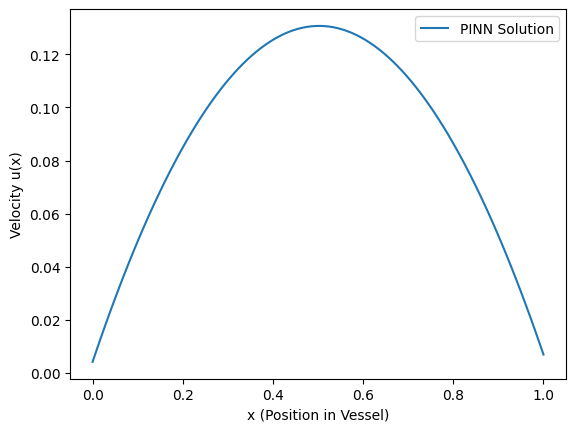

In [59]:
import torch
import deepxde as dde
import numpy as np

# Define the differential equation for blood flow (simplified Navier-Stokes)
def blood_flow(x, y):
    du_x = dde.grad.jacobian(y, x, i=0, j=0)  # du/dx
    du_xx = dde.grad.hessian(y, x, i=0, j=0)  # d^2u/dx^2
    return du_xx + 1  # Poiseuille flow: d^2u/dx^2 = -1

# Define geometry (1D vessel of length L)
L = 1.0
domain = dde.geometry.Interval(0, L)

# Boundary conditions (no-slip condition at vessel walls)
bc1 = dde.DirichletBC(domain, lambda x: 0, lambda x, on_boundary: np.isclose(x[0], 0))
bc2 = dde.DirichletBC(domain, lambda x: 0, lambda x, on_boundary: np.isclose(x[0], L))

# Define the PDE problem
pde = dde.data.PDE(
    domain, blood_flow, [bc1, bc2], num_domain=10, num_boundary=2
)

# Define the neural network
net = dde.nn.FNN([1] + [20] * 3 + [1], "tanh", "Glorot normal")

# Compile and train the model
model = dde.Model(pde, net)
model.compile("adam", lr=0.01)
loss_history, train_state = model.train(epochs=5000)

# Plot results
import matplotlib.pyplot as plt
x_test = np.linspace(0, L, 100)[:, None]
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred, label="PINN Solution")
plt.xlabel("x (Position in Vessel)")
plt.ylabel("Velocity u(x)")
plt.legend()
plt.show()
